### Mariam Adeyemo
BDP Final Project

## Part 4

**Timeline of Tweets**

In [1]:
#Ensure we are using the right kernel
spark.version

'3.1.3'

In [2]:
import os
import subprocess
import shutil
import pandas as pd
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [3]:
warnings.filterwarnings(action='ignore')
spark = SparkSession.builder.getOrCreate()

In [4]:
#Add "eagerEval.enabled" to beautify the way Spark DF is displayed
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [5]:
# Saving results into individual bucket
bucket_write = 'msca-bdp-data-shared'

### Loading the processed tweet into spark dataframe

In [6]:
path_read = 'gs://msca-bdp-students-bucket/shared_data/mariamoluwatobi/categorised_twitterers'

In [7]:
%%time

tweets_filt3 = spark.read.parquet(path_read)

CPU times: user 2.14 ms, sys: 6.05 ms, total: 8.2 ms
Wall time: 7.07 s


23/03/07 19:50:24 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [8]:
tweets_filt3.count()

36600074

## Question 3: What are the timelines of these tweets? 

## Do you see significant peaks and valleys?

### Get the timeline of tweets for unverified users 

In [9]:
# Extract the year, month, day, and hour from the tweet_created_at column
tweets_filt3 = tweets_filt3.withColumn("year", year(tweets_filt3["tweet_created_at"]))
tweets_filt3 = tweets_filt3.withColumn("month", month(tweets_filt3["tweet_created_at"]))
tweets_filt3 = tweets_filt3.withColumn("day", dayofmonth(tweets_filt3["tweet_created_at"]))
tweets_filt3 = tweets_filt3.withColumn("hour", hour(tweets_filt3["tweet_created_at"]))

In [10]:
#filter for verified users
unverified_users = tweets_filt3.filter(tweets_filt3.user_verified == 'false')

In [11]:
unverified_users.count()

35973819

In [12]:
unverified_users.limit(5)

user_id,user_name,user_screen_name,user_created_at,user_location,user_description,user_verified,user_followers_count,user_friends_count,user_favourites_count,user_statuses_count,tweet_id_str,tweet_created_at,tweet_text,text,tweet_quote_count,tweet_is_quote_status,tweet_timestamp_ms,tweet_retweeted_from,tweet_reply_count,tweet_retweeted_status,tweet_possibly_sensitive,tweet_favorite_count,tweet_location,tweet_city,tweet_coordinates,user_category,year,month,day,hour
1165053327283040257,🤤,fvgho3,2019-08-24 00:09:11,DFW TX,Here for some fun 🤪,false,378,1235,28943,42190,1537091559996399617,2022-06-15 15:16:00,Crazy in high sch...,rt icyjaayyy craz...,0,false,1655306160340,icyjaayyy,0,"{null, Wed Jun 15...",true,0,null,null,null,Someone Else,2022,6,15,15
1496623288558231554,AKJ🌻,PeepsKnow,2022-02-23 23:12:16,null,null,false,52,384,14928,8453,1537091566447337479,2022-06-15 15:16:01,Suffolk Universit...,rt davidpaleologo...,0,false,1655306161878,davidpaleologos,0,"{null, Wed Jun 15...",null,0,null,null,null,Someone Else,2022,6,15,15
3142628812,Laura Willey,VBAVIDCoach,2015-04-07 02:53:35,"Virginia Beach, VA","Proud mom, teache...",false,600,743,8683,1739,1537091567927889920,2022-06-15 15:16:02,The power of refl...,rt mrscollins_avi...,0,false,1655306162231,mrscollins_AVID,0,"{null, Tue Jun 14...",null,0,null,null,null,Someone Else,2022,6,15,15
535843350,Angela Perkins,EbayAngela,2012-03-24 22:10:21,"Maryland, USA","I love ""treasure ...",false,177,380,17,1543,1537091568481538049,2022-06-15 15:16:02,Americas Spirit G...,americas spirit g...,0,false,1655306162363,eBay,0,null,false,0,null,null,null,Someone Else,2022,6,15,15
885333150859243521,Mahmoud Elkassih,MElkassih,2017-07-13 03:00:46,null,null,false,11,157,6093,4504,1537091577138618368,2022-06-15 15:16:04,I don’t care what...,rt michaelharriot...,0,false,1655306164427,michaelharriot,0,"{null, Tue Jun 14...",null,0,null,null,null,Someone Else,2022,6,15,15


In [13]:
unverified_users.select("year").distinct().show(truncate=False)

+----+
|year|
+----+
|2023|
|2022|
+----+



In [14]:
#use the "createOrReplaceTempView" to store my dataframe in order to run SparkSQL statements against the data
unverified_users.createOrReplaceTempView("unverified_users_data")

In [15]:
tweets_timeline = spark.sql(\
                              "SELECT year, month, day, count(*) AS total_tweets\
                              FROM unverified_users_data\
                              GROUP BY year, month, day\
                              ORDER BY month")

tweets_timeline.show(5)

+----+-----+---+------------+
|year|month|day|total_tweets|
+----+-----+---+------------+
|2023|    1| 14|      101270|
|2023|    1| 29|       90332|
|2023|    1| 25|      138477|
|2023|    1| 15|       94476|
|2023|    1| 16|      108832|
+----+-----+---+------------+
only showing top 5 rows



In [16]:
tweets_timeline.count()

310

### Transfer the timeline tweet to Pandas

In [17]:
pd_tweets_timeline = tweets_timeline.limit(1_000).toPandas()
pd_tweets_timeline.head(5)

,year,month,day,total_tweets
0,2023,1,21,116757
1,2023,1,30,111031
2,2023,1,11,120349
3,2023,1,12,140545
4,2023,1,9,104548


### Filter to get the monthly and daily tweet frequency for each year

In [18]:
#Filtering to get the monthly and daily tweet in 2022
pd_tweets_timeline_22 = pd_tweets_timeline[pd_tweets_timeline['year'] == 2022]
pd_tweets_timeline_22.head(5)

,year,month,day,total_tweets
39,2022,4,23,87487
40,2022,4,27,150305
41,2022,4,20,121975
42,2022,4,7,131037
43,2022,4,5,99911


In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

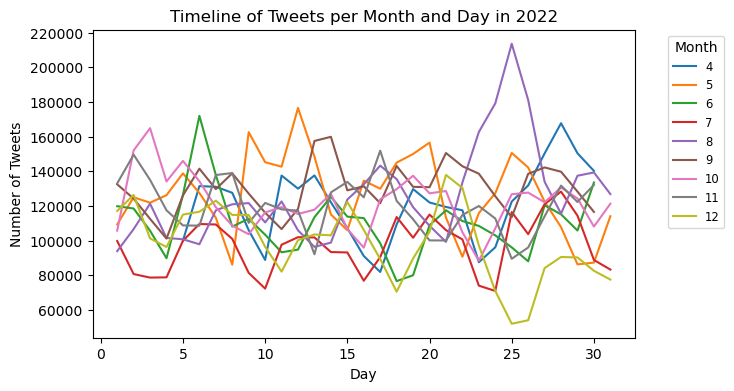

In [20]:
# Plot the timeline of tweets per month and day
fig, ax = plt.subplots(figsize=(7, 4))
pd_tweets_timeline_22.pivot(index='day', columns='month', values='total_tweets').plot(ax=ax)
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.title('Timeline of Tweets per Month and Day in 2022')
legend = plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

### Further Analysis on the 2022 timelines

In [72]:
#Filter to get the rows from August 25
month_tweets_df = unverified_users.filter((col("year") == 2022) & (col("month") == 8) & (col("day") == 25))

In [76]:
day_hour_counts_df = month_tweets_df.groupby("hour").agg(count("*").alias("tweet_count"))

In [77]:
# Convert the dataframe to a Pandas dataframe for plotting
day_hour_counts_pd = day_hour_counts_df.toPandas()

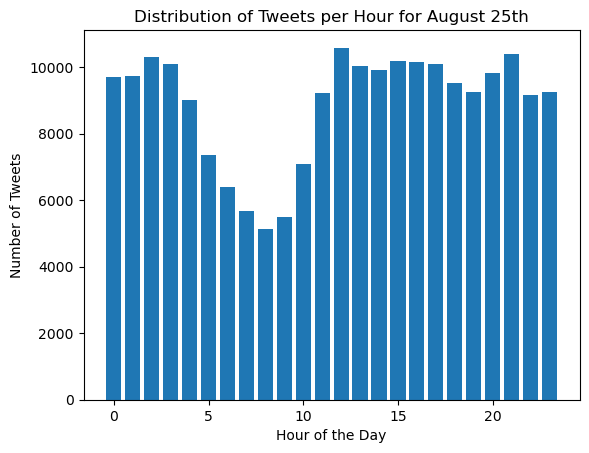

In [82]:
# Plot the distribution of tweets per hour using a bar chart
plt.bar(day_hour_counts_pd["hour"], day_hour_counts_pd["tweet_count"])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Tweets per Hour for August 25th")
plt.show()

In [88]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df = unverified_users.filter((col("month") == 8) & (col("day") == 25) & (col("hour") == 12))

In [89]:
# Extract the 'tweet_text' column for August 25 tweets
August_25_tweet_text = filtered_df.select("text")
August_25_tweet_text.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                     |
+-----------------------------------------------------------------------------------------------------------------------------------------+
|rt igaeduconsult the netherlands joined the group chat if you re interested in studying at a dutch university contact us igaedu          |
|nypost maybe it s for the white people who thought college would get them a career it is a scam commie indoctr https tco 9yp2vdpz6u      |
|nike hoops elite pro backpack university red black mtlc cool grey owfyutn https tco 4mar3nc6je                                           |
|rt nickadamsinusa woke schools should be shut down and woke teachers should be fired                                                     |
|rt tristansnell don

In [31]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df2 = unverified_users.filter((col("month") == 8) & (col("day") == 25))

In [32]:
# Extract the 'tweet_text' column for August 25 tweets
august_25_tweet_text = filtered_df2.select("text")
august_25_tweet_text.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                     |
+-----------------------------------------------------------------------------------------------------------------------------------------+
|rt donaldjtrumpjr tax the university endowments pass it on                                                                               |
|rt msolurin having an if you can t afford to go you shouldn t go mindset towards people pursuing college via student loans really tells  |
|fur_elise_ fordmb1 maryramji reppressley so you re only responsible if you re able to pay your way through college                       |
|abc biden s big dump the big reduction dump act joe biden just took a big old dump on over 70 of us cit https tco b2svrvsolv             |
|dwhitmanbtc way2liv

In [92]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df3 = unverified_users.filter((col("month") == 4) & (col("day") == 28))

In [93]:
# Extract the 'tweet_text' column for Aril 28 tweets
April_28_tweet_text = filtered_df3.select("text")
April_28_tweet_text.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                   |
+---------------------------------------------------------------------------------------------------------------------------------------+
|rt kpop_herald hybeofficialtwt s chairman bang si hyuk received an honorary doctorate from seoul national university bang is the first |
|rt igbohistofacts did you know that during the nigerian biafran civil war federal troops invaded the university of nigeria nsukka libr |
|rt bannet001 the back to school shopping bonanza is here edufair22 provides a platform for conversation between school administrators  |
|rt mamataofficial glad to learn that the calcutta university has been ranked 1st in india among all central and state aided public uni |
|rt workwellldn meet jaden he had 

In [35]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df4 = unverified_users.filter((col("month") == 12) & (col("day") == 21))

In [37]:
# Extract the 'tweet_text' column for Dec 21 tweets
Dec_21_tweet_text = filtered_df4.select("text")
Dec_21_tweet_text.show(30, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                      |
+------------------------------------------------------------------------------------------------------------------------------------------+
|rt oskabir92 bet keh bossolamilekan1 if only u know what god just used you to do for me i m a private school teacher with 25k as s        |
|paddy macadam diana brown boyce needham https tco t8zcs3mkxr usually chair college debate                                                 |
|greatness i evaluating the benefits and drawbacks of any university worth the name archangel zadkiel                                      |
|rt proetrie my friend dating an instagram influencer told me she has been taking adderall since she was in middle school amp can no longer|
|rt pennycarr

In [40]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df5 = unverified_users.filter((col("month") == 10) & (col("day") == 3))

In [41]:
# Extract the 'tweet_text' column for Oct 3 tweets
Oct_3_tweet_text = filtered_df5.select("text")
Oct_3_tweet_text.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                     |
+-----------------------------------------------------------------------------------------------------------------------------------------+
|rt itsellarmy sayona89691848 sos students at universities such as sharif university of technology and tabriz universities are trapped an |
|physical education sy 22 23 at barack obama green charter high school in plainfield nj physical education teach https tco esy6cl7uaq     |
|rt asranarshism sunday oct 2nd sharif university the university students all across iran are striking the regime s response to shar      |
|live plant vs clearwater central catholic florida high school volleyball watch streaming now https tco bisj7qjwm7                        |
|selena is such a pr

In [42]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df6 = unverified_users.filter((col("month") == 6) & (col("day") == 6))

In [43]:
# Extract the 'tweet_text' column for June 6 tweets
June_6_tweet_text = filtered_df6.select("text")
June_6_tweet_text.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                       |
+-------------------------------------------------------------------------------------------------------------------------------------------+
|rt ninaturner neoliberals would rather blame susan sarandon than the electoral college because it doesn t force them to challenge the sta  |
|jkk4721 redstatejimy maga_translator realzacstanley1 angryfleas whagyjr educatingtrump2 pgbm2 bacchaus351 https tco jrisb3ny6d             |
|rt occupydemocrats breaking news after kyle rittenhouse announces that he will be attending texas aamp m university in the fall the univer |
|rt copacabaaana you know when i was young i k1lled myself in roblox high school                                                            |
|rt ri

In [94]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df7 = unverified_users.filter((col("month") == 5) & (col("day") == 12))

In [95]:
# Extract the 'tweet_text' column for June 6 tweets
May_12_tweet_text = filtered_df7.select("text")
May_12_tweet_text.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                  |
+--------------------------------------------------------------------------------------------------------------------------------------+
|rt itr9gela k 14 shut the fuck up imagine we will spend half our lives studying but the elected president isn t even a college graduat|
|graduated college making it to the 4 of foster kids with a degree exactly ten years ago today i went to the cour https tco rswmvwjxp4 |
|milephakphum mile your words are really helping me i am really going through a hard time with university but you https tco wymmp1j4yn |
|fannin county middle school at sunrise and it s 523 f https tco aoz6rdmpqr                                                            |
|the university of rochester strong memor

### Filter to 2023

In [96]:
#Filtering to get the monthly and daily tweet in 2023
pd_tweets_timeline_23 = pd_tweets_timeline[pd_tweets_timeline['year'] == 2023]
pd_tweets_timeline_23.head(5)

,year,month,day,total_tweets
0,2023,1,21,116757
1,2023,1,30,111031
2,2023,1,11,120349
3,2023,1,12,140545
4,2023,1,9,104548


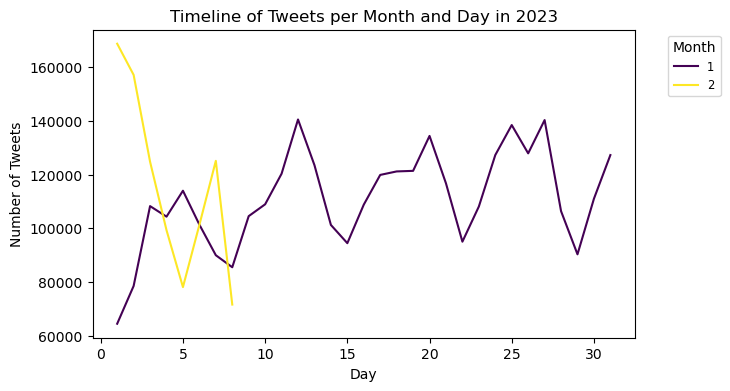

In [97]:
# Plot the timeline of tweets per month and day
cmap = plt.cm.viridis

fig, ax = plt.subplots(figsize=(7, 4))
pd_tweets_timeline_23.pivot(index='day', columns='month', values='total_tweets').plot(ax=ax, cmap=cmap)
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.title('Timeline of Tweets per Month and Day in 2023')
legend = plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

### Further Analysis on the 2023 timelines

In [98]:
#Filter to get rows from February 1
month_tweets_df2 = unverified_users.filter((col("year") == 2023) & (col("month") == 2) & (col("day") == 1))

In [99]:
day_hour_counts_df2 = month_tweets_df2.groupby("hour").agg(count("*").alias("tweet_count"))

In [100]:
# Convert the dataframe to a Pandas dataframe for plotting
day_hour_counts_pd2 = day_hour_counts_df2.toPandas()

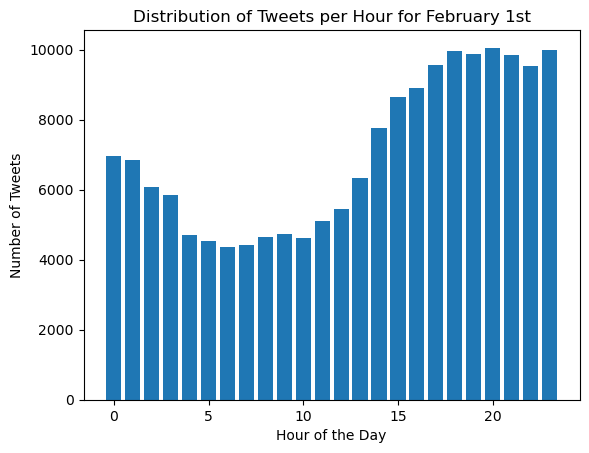

In [102]:
# Plot the distribution of tweets per hour using a bar chart
plt.bar(day_hour_counts_pd2["hour"], day_hour_counts_pd2["tweet_count"])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Tweets per Hour for February 1st")
plt.show()

In [107]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df8 = unverified_users.filter((col("year") == 2023) & (col("month") == 2) & (col("day") == 1) & (col("hour") == 20))

In [109]:
# Extract the 'tweet_text' column for Feb 1 tweets
Feb_1_tweet_text = filtered_df8.select("text")
Feb_1_tweet_text.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                     |
+-----------------------------------------------------------------------------------------------------------------------------------------+
|rt 2tchalla2stan did netflix forget about college students                                                                               |
|rt deanobeidallah wow the college board erased everything from ap african american history course that ron desantis objected to this is  |
|drloupis clownworld_ i think it s awesome probably some high school kid on a dare harmless fun looks like the https tco sskdnqzdde       |
|rt jahrihanna teacher this behaviour won t fly in college that behaviour in college https tco 7hzwef9kkx                                 |
|rt tteokminnie you 

In [111]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df9 = unverified_users.filter((col("year") == 2023) & (col("month") == 2) & (col("day") == 1))

In [112]:
# Extract the 'tweet_text column for Feb 1 tweets
Feb_1_tweet_text = filtered_df9.select("text")
Feb_1_tweet_text.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                         |
+---------------------------------------------------------------------------------------------------------------------------------------------+
|rt clownworld_ new toilets at loughborough university in england https tco pbacfp9lgc                                                        |
|rt sharrond62 primary school are being encouraged by local authorities amp lgbtq teachers representatives to do away with separate boys amp g|
|the w basketball teams on the road tonight at belhaven university all our muwedu muwalumniassoc folks in jackson https tco pbdaxi9h2i        |
|rt quainetwork unfortunately due to severe weather impacting many members of the team this week s quai university call has been cancell

In [113]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df10 = unverified_users.filter((col("year") == 2023) & (col("month") == 1) & (col("day") == 12))

In [114]:
# Extract the 'tweet_text' column for Jan 12 tweets
Jan_12_tweet_text = filtered_df10.select("text")
Jan_12_tweet_text.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                    |
+----------------------------------------------------------------------------------------------------------------------------------------+
|with this college will be                                                                                                               |
|i haven t had pants that shirt since my last growth spurt in elementary school and blue isn t my color                                  |
|rt drjbhattacharya this piece is a bit more personal and was very hard for me to write it is on how stanford university my home failed  |
|douglas county vs brighton live high school 2023 wrestling stream at https tco 0ipxsojzx9 douglas county vs b https tco mp1yl2ih83      |
|rt thtigers2 congratulatio

In [116]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df11 = unverified_users.filter((col("year") == 2023) & (col("month") == 2) & (col("day") == 7))

In [117]:
# Extract the 'tweet_text column for Feb 7 tweets
Feb_7_tweet_text = filtered_df11.select("text")
Feb_7_tweet_text.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                     |
+-----------------------------------------------------------------------------------------------------------------------------------------+
|rt laralogan students mercilessly assault 9 year old girl on school bus parents pressing charges video fox news https tco mlb2mxi5       |
|rt gatewaypundit elementary school starts student club that excludes white kids https tco uvn8ib01tr                                     |
|rt auxgod_ thirty three years ago today lisa leslie dropped 101 points in the first half of her high school game 16 mins https           |
|calling all college students join mazars for a virtual open house as a way to meet with firm leadership ask quest https tco 88s1ahrxfv   |
|rt keyz05 college c

In [118]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df12 = unverified_users.filter((col("year") == 2023) & (col("month") == 1) & (col("day") == 20))

In [121]:
# Extract the 'tweet_text column for Jan 20 tweets
Jan_20_tweet_text = filtered_df12.select("text")
Jan_20_tweet_text.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                    |
+----------------------------------------------------------------------------------------------------------------------------------------+
|rt iamcouncil muslim students in various bjp ruled states are being denied entry into schools colleges with hijab students in moradabad |
|colorstv mcstan bbkingmcstan university                                                                                                 |
|tied to college so i stood in the good job                                                                                              |
|rt rudeboypsquare out of the 74million youths eligible voters 26million of them are students and they are all back in school most of t  |
|rt adeewunmi secondary sch

### Get the monthly and daily tweet frequency in 2022 for verified users 

In [122]:
#filter for verified users
verified_users = tweets_filt3.filter(tweets_filt3.user_verified == 'true')

In [123]:
verified_users.count()

626255

In [124]:
verified_users.limit(5)

user_id,user_name,user_screen_name,user_created_at,user_location,user_description,user_verified,user_followers_count,user_friends_count,user_favourites_count,user_statuses_count,tweet_id_str,tweet_created_at,tweet_text,text,tweet_quote_count,tweet_is_quote_status,tweet_timestamp_ms,tweet_retweeted_from,tweet_reply_count,tweet_retweeted_status,tweet_possibly_sensitive,tweet_favorite_count,tweet_location,tweet_city,tweet_coordinates,user_category,year,month,day,hour
85362822,UTSA,UTSA,2009-10-26 17:10:20,"San Antonio, TX",Official Twitter ...,true,81496,2277,49447,30112,1554464878945083393,2022-08-02 13:51:22,UTSA was invited ...,utsa was invited ...,0,false,1659448282358,null,0,null,false,0,null,null,null,University,2022,8,2,13
344718893,NBS Television,nbstv,2011-07-29 13:50:11,Uganda,The Political com...,true,1343894,291,15623,368578,1554465052098445314,2022-08-02 13:52:03,As .@Makerere con...,as makerere conti...,0,false,1659448323641,null,0,null,false,0,null,null,null,News Outlet,2022,8,2,13
344718893,NBS Television,nbstv,2011-07-29 13:50:11,Uganda,The Political com...,true,1343897,291,15623,368578,1554465264552628225,2022-08-02 13:52:54,As @Makerere cont...,as makerere conti...,0,false,1659448374294,Makerere continue...,0,null,false,0,null,null,null,News Outlet,2022,8,2,13
1851824340,Josh Moody,byJoshMoody,2013-09-10 15:56:59,"Washington, DC",Reporter @insideh...,true,1972,1285,19040,9389,1554465435935973377,2022-08-02 13:53:35,Tensions between ...,rt insidehighered...,0,false,1659448415155,insidehighered,0,"{null, Tue Aug 02...",null,0,null,null,null,News Outlet,2022,8,2,13
108689047,WECDSB,WECDSB,2010-01-26 19:09:38,"Windsor, Ontario,...",Windsor-Essex Cat...,true,10033,385,5435,21979,1554465745496596482,2022-08-02 13:54:48,The @DOL_ca is ho...,the dol_ca is hos...,0,false,1659448488960,DOL_ca is hosting...,0,null,false,0,null,null,null,University,2022,8,2,13


In [125]:
#use the "createOrReplaceTempView" to store my dataframe in order to run SparkSQL statements against the data
verified_users.createOrReplaceTempView("verified_users_data")

In [126]:
tweets_timeline2 = spark.sql(\
                              "SELECT year, month, day, count(*) AS total_tweets\
                              FROM verified_users_data\
                              GROUP BY year, month, day\
                              ORDER BY month")

In [127]:
tweets_timeline2.count()

310

### Transfer the timeline tweet to Pandas

In [128]:
pd_tweets_timeline2 = tweets_timeline2.limit(1_000).toPandas()
pd_tweets_timeline2.head(5)

,year,month,day,total_tweets
0,2023,1,27,2739
1,2023,1,8,1095
2,2023,1,3,2039
3,2023,1,21,1535
4,2023,1,5,2022


In [129]:
#Filtering to get the monthly and daily tweet in 2022
pd_tweets_timeline_2_22 = pd_tweets_timeline2[pd_tweets_timeline2['year'] == 2022]
pd_tweets_timeline_2_22.head(5)

,year,month,day,total_tweets
39,2022,4,20,2907
40,2022,4,7,2976
41,2022,4,30,1965
42,2022,4,10,1208
43,2022,4,11,2444


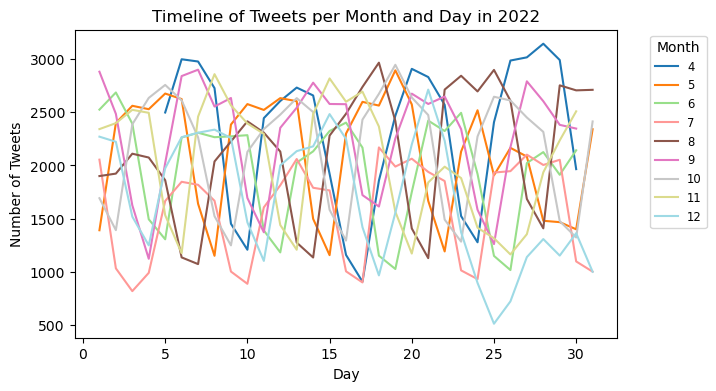

In [130]:
# Plot the timeline of tweets per month and day
cmap = plt.cm.tab20

fig, ax = plt.subplots(figsize=(7, 4))
pd_tweets_timeline_2_22.pivot(index='day', columns='month', values='total_tweets').plot(ax=ax, cmap=cmap)
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.title('Timeline of Tweets per Month and Day in 2022')
legend = plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

### Further Analysis on the 2022 timelines for verified users

In [131]:
#Filter to get rows from April 28
month_tweets_df3 = verified_users.filter((col("year") == 2022) & (col("month") == 4) & (col("day") == 28))

In [132]:
day_hour_counts_df3 = month_tweets_df3.groupby("hour").agg(count("*").alias("tweet_count"))

In [133]:
# Convert the dataframe to a Pandas dataframe for plotting
day_hour_counts_pd3 = day_hour_counts_df3.toPandas()

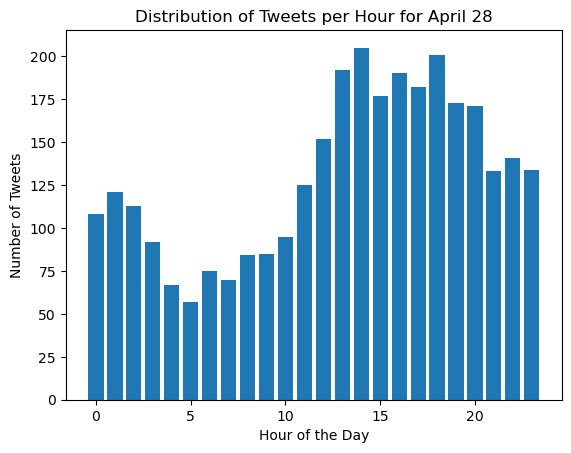

In [134]:
# Plot the distribution of tweets per hour using a bar chart
plt.bar(day_hour_counts_pd3["hour"], day_hour_counts_pd3["tweet_count"])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Tweets per Hour for April 28")
plt.show()

In [140]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df13 = verified_users.filter((col("year") == 2022) & (col("month") == 4) & (col("day") == 28) & (col("hour") == 18))

In [141]:
# Extract the 'tweet_text' column for April 28 tweets from verified users
April_28_tweet_vtext = filtered_df13.select("text")
April_28_tweet_vtext.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                   |
+---------------------------------------------------------------------------------------------------------------------------------------+
|rebeccapapin nice way of framing it my kid finished high school in tokyo thankful for that time                                        |
|all students now have access to https tco yxbsqdzxaw through schoology so give it a try you can also send in p https tco hjc0hehmje    |
|rt proffeynman students don t need a perfect teacher students need a happy teacher who s gonna make them excited to come to school and |
|rt ryanpuglisi5 after a great conversation with coachwaltbell i am blessed to receive an offer from indiana university jonathanwhol    |
|whilst there has been a visible i

In [143]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df14 = verified_users.filter((col("year") == 2022) & (col("month") == 8) & (col("day") == 18))

In [145]:
# Extract the 'tweet_text' column for Aug 28 tweets from verified users
Aug_28_tweet_vtext = filtered_df10.select("text")
Aug_28_tweet_vtext.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                    |
+----------------------------------------------------------------------------------------------------------------------------------------+
|with this college will be                                                                                                               |
|i haven t had pants that shirt since my last growth spurt in elementary school and blue isn t my color                                  |
|rt drjbhattacharya this piece is a bit more personal and was very hard for me to write it is on how stanford university my home failed  |
|douglas county vs brighton live high school 2023 wrestling stream at https tco 0ipxsojzx9 douglas county vs b https tco mp1yl2ih83      |
|rt thtigers2 congratulatio

In [146]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df15 = verified_users.filter((col("year") == 2022) & (col("month") == 10) & (col("day") == 1))

In [147]:
# Extract the 'tweet_text' column for Oct 1 tweets from verified users
Oct_1_tweet_vtext = filtered_df15.select("text")
Oct_1_tweet_vtext.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                   |
+---------------------------------------------------------------------------------------------------------------------------------------+
|rt inquirersports national university sta elena star nico almendras was crowned mvp of the 2022 spikersturf open conference lanceag    |
|news today s event at the university of johannesburg is officially sold out i m on the way i ll be there at 12pm https tco z59yolyja5  |
|amitos time will tell but as someone who did his four college years alone while his family was half a world away https tco l4nes9umtb  |
|october is blackhistorymonth events arranged by the university and dusadundee will help us learn about reflect https tco s5rju7j7ji    |
|flown the nest it s important to 

In [148]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df16 = verified_users.filter((col("year") == 2022) & (col("month") == 8) & (col("day") == 25))

In [149]:
# Extract the 'tweet_text' column for August 25 tweets from verified users
Aug_25_tweet_vtext = filtered_df16.select("text")
Aug_25_tweet_vtext.show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                      |
+------------------------------------------------------------------------------------------------------------------------------------------+
|factcheck philippine daily inquirer counted 27 chairs and 43 students in the classroom the president of the scho https tco w8mfp4hmuc     |
|how north texas colleges are fighting the spread of monkeypox as students return to campus https tco hq6ziuhjhd                           |
|mattwalshblog because colleges and universities are no longer about creating employers and employees they are abo https tco gfa6s2dluj    |
|rt drbethakers reduce demand for college by making sure young people have other pathways to good jobs tuition inflation will slow         |
|rt dougjball

In [150]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df17 = verified_users.filter((col("year") == 2022) & (col("month") == 4) & (col("day") == 20))

In [153]:
# Extract the 'tweet_text' column for April 20 tweets from verified users
April_20_tweet_vtext = filtered_df17.select("text")
April_20_tweet_vtext.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                    |
+----------------------------------------------------------------------------------------------------------------------------------------+
|rt davelbywater the european_ems flag s wee tour of scotland continues today standrews the home of golf amp scotland oldest university  |
|rt levelnextgg it s official levelnext amp easportsfifa are bringing you the 1st ever levelnext fifa 22 college national championship   |
|viewpoint columnist anna falk shares songs that have gotten her to the halfway point of her college career https tco pt0atzvknz         |
|students at the appalachian school of law will soon have a unique opportunity in virginia courtrooms https tco sw8dqik4hx               |
|rt bretontheradio happy 4 

In [154]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df18 = verified_users.filter((col("year") == 2022) & (col("month") == 12) & (col("day") == 21))

In [155]:
# Extract the 'tweet_text' column for Dec 21 tweets from verified users
Dec_21_tweet_text = filtered_df18.select("text")
Dec_21_tweet_text.show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                      |
+------------------------------------------------------------------------------------------------------------------------------------------+
|rt sahar_fetrat afghan university women feared this dark day https tco e9skwo0zon                                                         |
|rt karenmmiddleton women have now been banned from university in afghanistan amp girls from school taliban 20 yeah right                  |
|30550 new teacher recruits 9000 on permanent and pensionable terms and 21550 teacher interns will be posted t https tco wnxsfrghau        |
|rt mariamistan the taliban s decision to ban women from attending university is not only a blatant violation of human rights it is also   |
|rt obaidward

### checking the distribution of the verified twitterers

In [156]:
unique_organization = verified_users.dropDuplicates(["user_id"])

In [157]:
#use the "createOrReplaceTempView" to store my dataframe in order to run SparkSQL statements against the data
unique_organization.createOrReplaceTempView("unique_data2")

In [159]:
verified_user_dist = spark.sql(\
                              "SELECT user_category, count(*) AS total_twitterers\
                              FROM unique_data2\
                              GROUP BY user_category\
                              ORDER BY total_twitterers DESC")

verified_user_dist.show(10)

+--------------------+----------------+
|       user_category|total_twitterers|
+--------------------+----------------+
|Social Media Infl...|           29700|
|         News Outlet|           25623|
|        Someone Else|           19602|
|   Government Entity|           11008|
|          University|            7453|
|Nonprofit Organiz...|            1618|
|              School|             252|
+--------------------+----------------+



### Filter to 2023 for verified twitterers

In [160]:
#Filtering to get the monthly and daily tweet in 2022
pd_tweets_timeline_2_23 = pd_tweets_timeline2[pd_tweets_timeline2['year'] == 2023]
pd_tweets_timeline_2_23.head(5)

,year,month,day,total_tweets
0,2023,1,27,2739
1,2023,1,8,1095
2,2023,1,3,2039
3,2023,1,21,1535
4,2023,1,5,2022


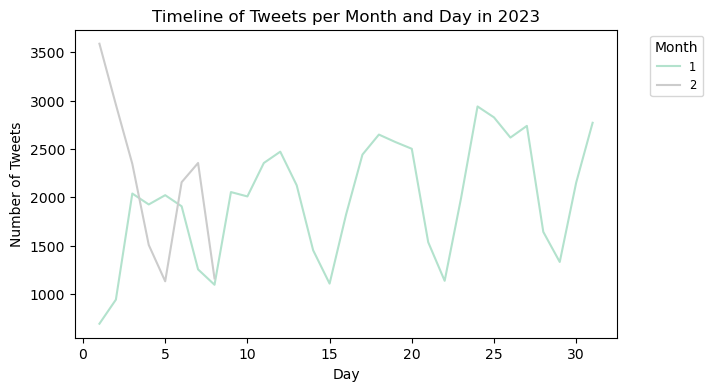

In [162]:
# Plot the timeline of tweets per month and day
cmap = plt.cm.Pastel2

fig, ax = plt.subplots(figsize=(7, 4))
pd_tweets_timeline_2_23.pivot(index='day', columns='month', values='total_tweets').plot(ax=ax, cmap=cmap)
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.title('Timeline of Tweets per Month and Day in 2023')
legend = plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

### Further Analysis on the 2023 timelines for verified users

In [163]:
#Filter to get rows from April 28
month_tweets_df4 = verified_users.filter((col("year") == 2023) & (col("month") == 2) & (col("day") == 1))

In [164]:
day_hour_counts_df4 = month_tweets_df4.groupby("hour").agg(count("*").alias("tweet_count"))

In [165]:
# Convert the dataframe to a Pandas dataframe for plotting
day_hour_counts_pd4 = day_hour_counts_df4.toPandas()

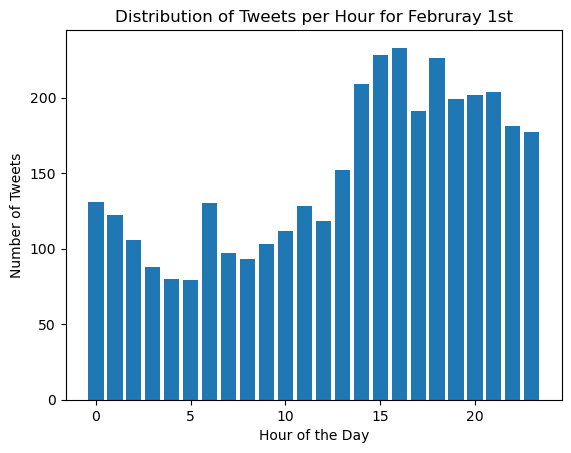

In [166]:
# Plot the distribution of tweets per hour using a bar chart
plt.bar(day_hour_counts_pd4["hour"], day_hour_counts_pd4["tweet_count"])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Tweets per Hour for Februray 1st")
plt.show()

In [167]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df19 = verified_users.filter((col("year") == 2023) & (col("month") == 2) & (col("day") == 1) & (col("hour") == 16))

In [168]:
# Extract the 'tweet_text' column for Feb 1 tweets from verified users
Feb_1_tweet_vtext = filtered_df19.select("text")
Feb_1_tweet_vtext.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                     |
+-----------------------------------------------------------------------------------------------------------------------------------------+
|rt sgvnsports la habra quarterback justin gil is signing his nli today at the school and will be attending mckendree university in illino|
|my friend is a high level scientist he s sent me a tweet by another academic at a major european university the https tco sgbgofukxu     |
|rt drkatrinaadkins university of sunderland launches esports event management degree https tco k9yipgtw8c asea aseainitaly               |
|i know a lot of people in college right now and many who went including myself his description of college life is https tco whm7x5g3cr   |
|so in addition to b

In [169]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df20 = verified_users.filter((col("year") == 2023) & (col("month") == 1) & (col("day") == 24))

In [170]:
# Extract the 'tweet_text' column for Jan 24 tweets from verified users
Jan_24_tweet_vtext = filtered_df20.select("text")
Jan_24_tweet_vtext.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                     |
+-----------------------------------------------------------------------------------------------------------------------------------------+
|michael tamil promotions begin meet dir_lokesh jeranjit divyanshaaaaaa amp me at coimbatore psg college of a https tco ieuxwfcold        |
|rt nathanheerdt how ridiculous according to the cif california s governing body of high school sports 21 of california schools repor     |
|teachers live here holland schools announces effort to help teachers buy homes in holland https tco 1qwh2ocbs7                           |
|rt swissdevcoop 244m children amp adolescents are not in school their right to education is being violated it s time to find new solution|
|every child deserve

In [171]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df21 = verified_users.filter((col("year") == 2023) & (col("month") == 1) & (col("day") == 18))

In [172]:
# Extract the 'tweet_text' column for Jan 18 tweets from verified users
Jan_18_vtweet_text = filtered_df21.select("text")
Jan_18_vtweet_text.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                    |
+----------------------------------------------------------------------------------------------------------------------------------------+
|rt aledlab new alabama wants to launch a teacher apprenticeship program that would allow college students to solo teach before graduatio|
|why have teachers in several florida school districts still not seen their state authorized raises state board of https tco ikbxbunkqk  |
|rt jefferyrushjr1 agtg i am extremely blessed to receive my 12th offer from auburn university wde coachhughfreeze coachronrobe          |
|rt bostonabcd new from commonwealthmag research indicates that summer jobs help boston high school students perform better in school g  |
|students prepared for thei

In [173]:
# Filter the tweet dataframe based on the peak noted on the plot
filtered_df22 = verified_users.filter((col("year") == 2023) & (col("month") == 2) & (col("day") == 7))

In [174]:
# Extract the 'tweet_text' column for Feb 7 tweets from verified users
Feb_7_tweet_vtext = filtered_df22.select("text")
Feb_7_tweet_vtext.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                   |
+---------------------------------------------------------------------------------------------------------------------------------------+
|rt mojahedineng february 6 ahvaz southwest iran students of a local university chanted against the regime s government spokesman ali   |
|rt fox5kaitlyn inappropriate behavior investigation video of clayton county teacher surfaces allegedly showing high school educator to |
|event calendar dalhousie university https tco qxjhh7lvpg                                                                               |
|rt edinguarantee audit scotland are recruiting for their trainee auditor school or college leaver programme auditscotland https tco    |
|the university is deeply saddened

In [ ]:
#save the filtered tweet into my bucket in a parquet format for easier loading
verified_users.write.format("parquet").\
mode('overwrite').\
save('gs://msca-bdp-students-bucket/shared_data/mariamoluwatobi/verified_twitterers')